# **Map SalishSea**

In [61]:
import numpy as np
import xarray as xr
import os
import sys
from datetime import datetime, timedelta

## Paths

In [62]:
def path(local = 1):
    '''Change with your paths'''
    if local == 1:
        path = {'NEMO': '/Users/jvalenti/MOAD/data/',
        'coords': '/Users/jvalenti/MOAD/grid/coordinates_seagrid_SalishSea201702.nc',
        'mask': '/Users/jvalenti/MOAD/grid2/mesh_mask202108_TDV.nc',
        'out': '/Users/jvalenti/MOAD/results/',
        'home': '/Users/jvalenti/MOAD/analysis-jose/notebooks/parcels',
        'anim': '/Users/jvalenti/MOAD/animations'}
    else:
        path = {'NEMO': '/results2/SalishSea/nowcast-green.202111/',
        'coords': '/ocean/jvalenti/MOAD/grid/coordinates_seagrid_SalishSea201702.nc',
        'coordsWW3': '/ocean/jvalenti/MOAD/grid2/WW3_grid.nc',
        'mask': '/ocean/jvalenti/MOAD/grid2/mesh_mask202108_TDV.nc',
        'bat': '/ocean/jvalenti/MOAD/grid/bathymetry_202108.nc',
        'out': '/home/jvalenti/MOAD/results',
        'home': '/home/jvalenti/MOAD/analysis-jose/notebooks/parcels',
        'anim': '/home/jvalenti/MOAD/animations'}
    return path

In [63]:
# Define paths
local = 1 #Set to 0 when working on server
paths = path(local)

## Simulation

In [64]:
def make_prefix(date, path, res='h'):
    """Construct path prefix for local SalishSeaCast results given date object and paths dict
    e.g., /results2/SalishSea/nowcast-green.201905/daymonthyear/SalishSea_1h_yyyymmdd_yyyymmdd
    """

    datestr = '_'.join(np.repeat(date.strftime('%Y%m%d'), 2))
    folder = date.strftime("%d%b%y").lower()
    prefix = os.path.join(path, f'{folder}/SalishSea_1{res}_{datestr}')
    
    return prefix
path_NEMO = make_prefix(datetime(2018, 12, 1), paths['NEMO'])


In [65]:
coords = xr.open_dataset(paths['coords'], decode_times=False)
mask = xr.open_dataset(paths['mask'])

In [66]:
mask

<xarray.Dataset>
Dimensions:       (y: 898, x: 398, z: 40, t: 1)
Dimensions without coordinates: y, x, z, t
Data variables: (12/46)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    ...            ...
    gdept_1d      (t, z) float64 ...
    gdepw_1d      (t, z) float64 ...
    e3t_1d        (t, z) float64 ...
    e3w_1d        (t, z) float64 ...
    totaldepth    (y, x) float32 ...
    volume        (z, y, x) int64 ...
Attributes:
    file_name:  mesh_mask.nc
    TimeStamp:  07/08/2021 17:25:49 -0700

grdinfo [WARNING]: "t", NetCDF: Variable not found
	If something bad happens later, try importing via GDAL.
grdinfo [WARNING]: "y", NetCDF: Variable not found
	If something bad happens later, try importing via GDAL.
grdinfo [WARNING]: "x", NetCDF: Variable not found
	If something bad happens later, try importing via GDAL.
grdinfo [ERROR]: No 3rd-dimension coordinate vector found in /Users/jvalenti/MOAD/grid2/mesh_mask202108_TDV.nc
grdinfo [ERROR]: gmtapi_import_cube: Unable to examine cube /Users/jvalenti/MOAD/grid2/mesh_mask202108_TDV.nc.
[Session pygmt-session (149)]: Error returned from GMT API: GMT_RUNTIME_ERROR (79)
[Session pygmt-session (149)]: Error returned from GMT API: GMT_RUNTIME_ERROR (79)


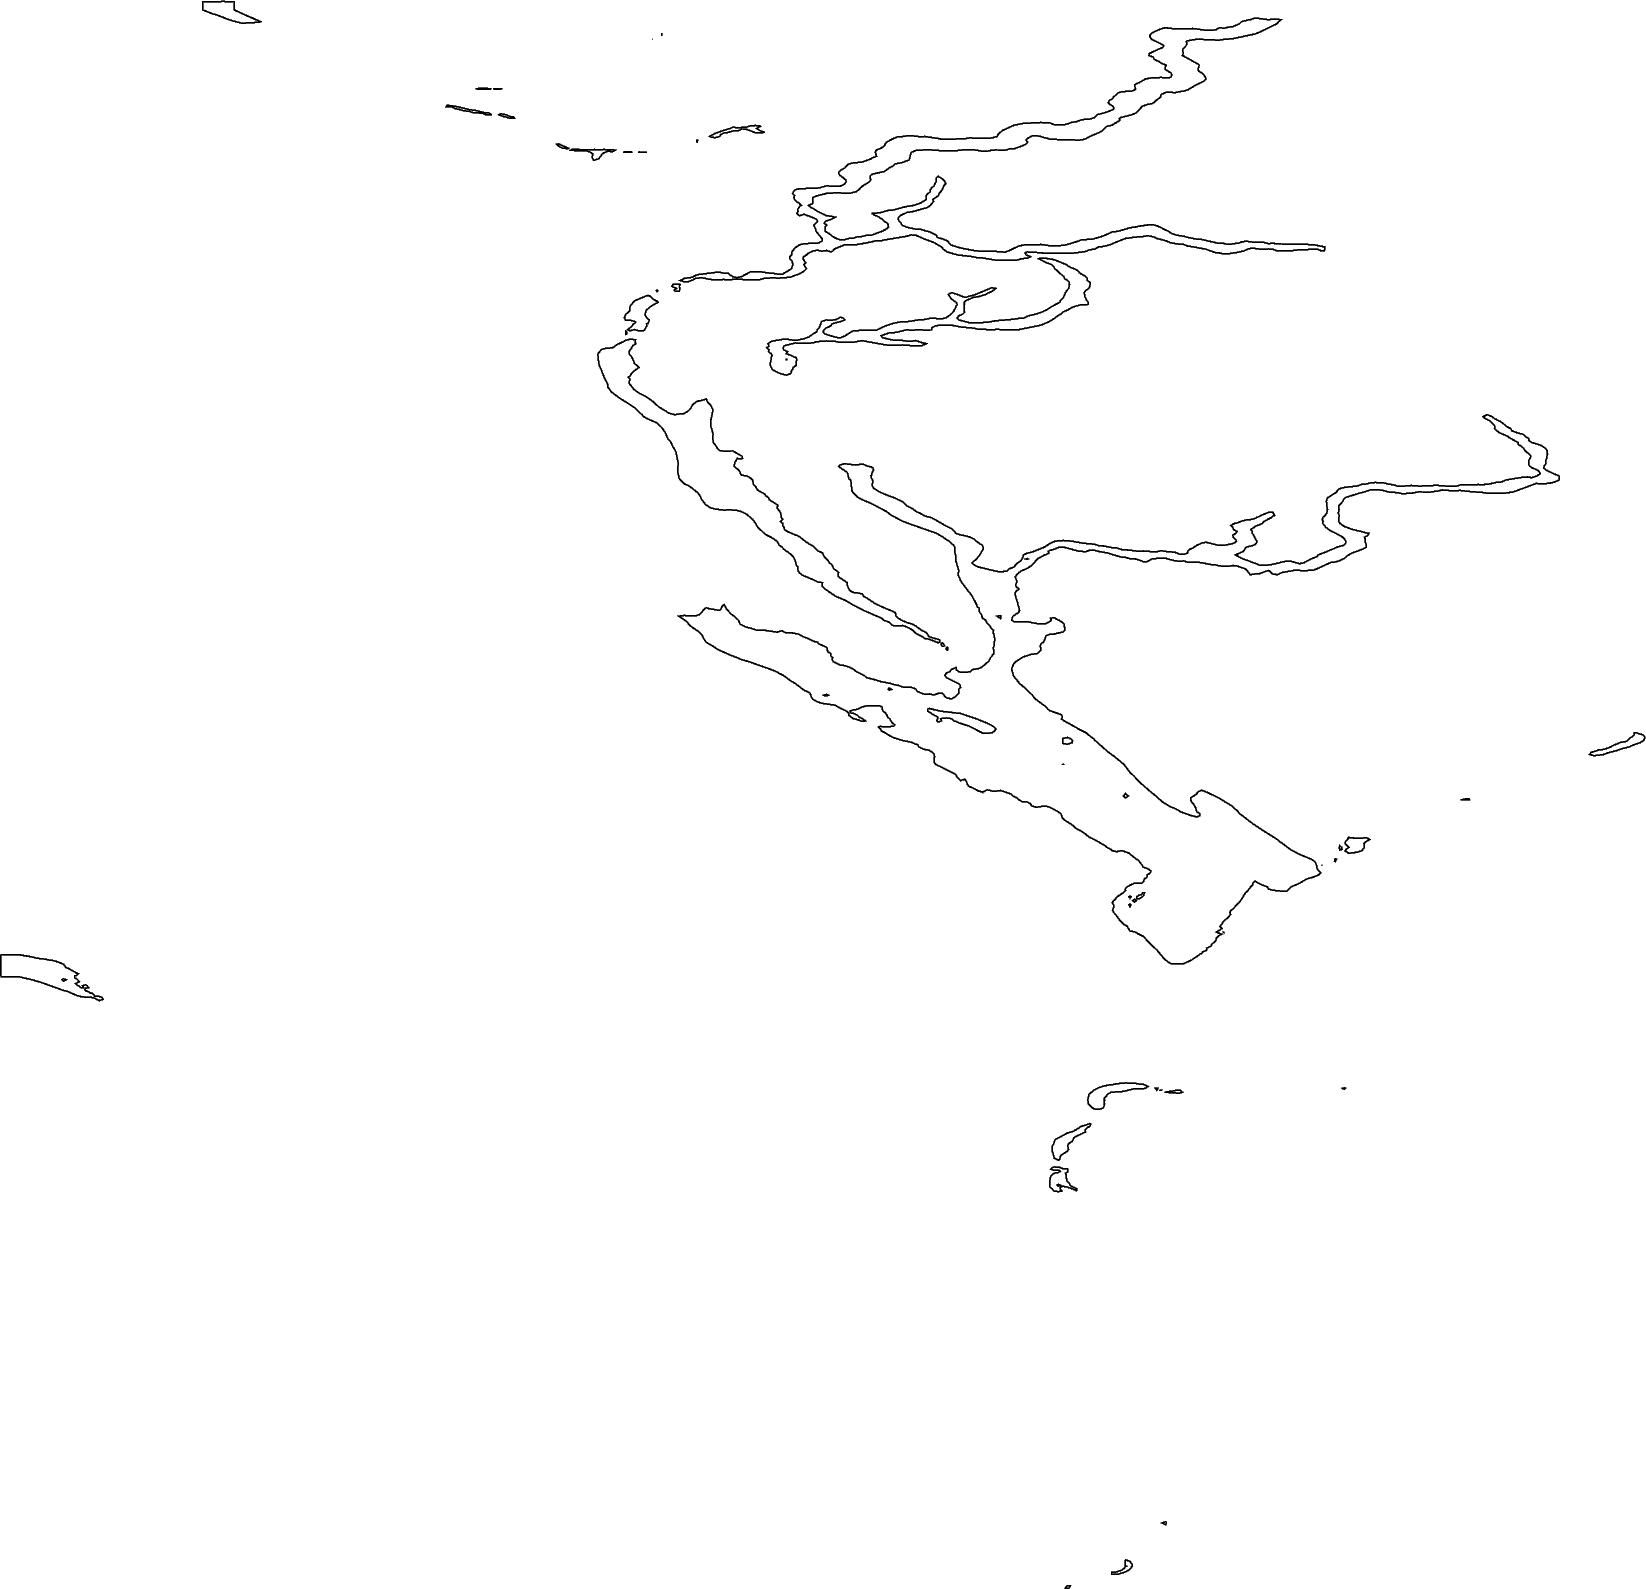

In [72]:
fig = pygmt.Figure()
fig.grdcontour(
    annotation=1000,
    interval=250,
    grid=mask.totaldepth,
)
fig.show()

grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from -122.3 to -122.166666667


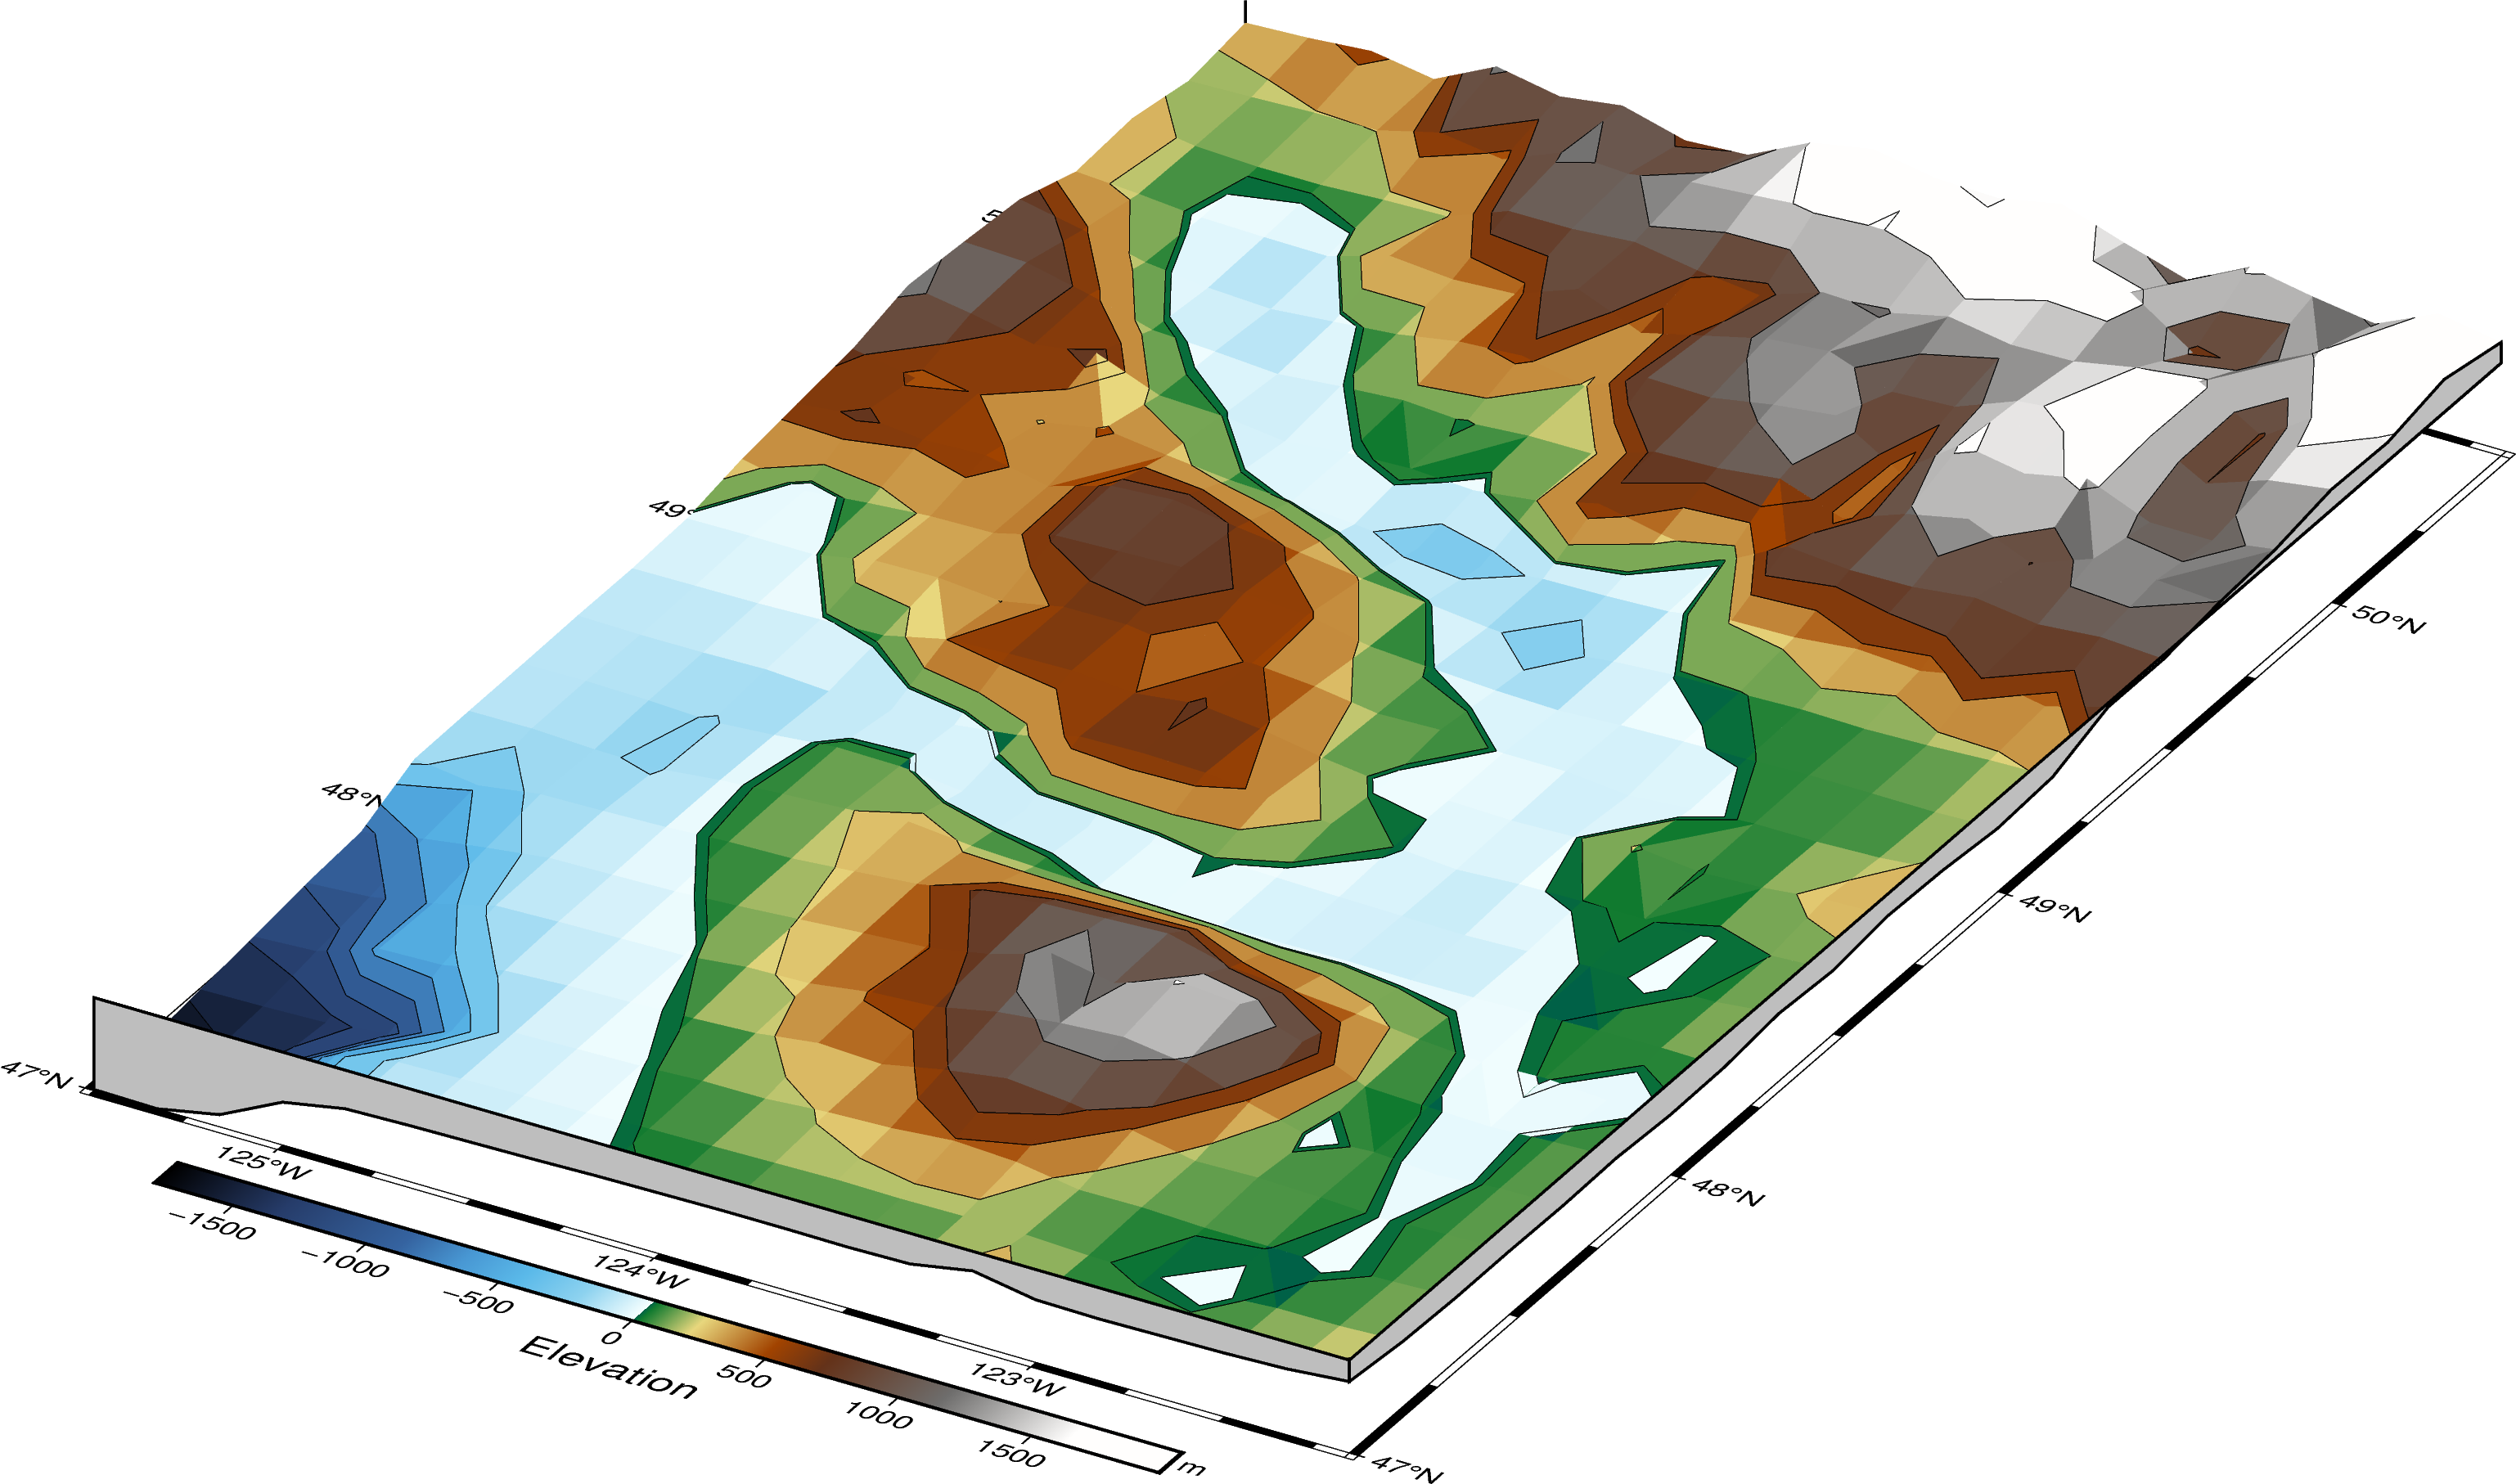

In [68]:
grid = pygmt.datasets.load_earth_relief(resolution="10m", region=[-125.5, -122.3, 47, 50.5])
fig = pygmt.Figure()
fig.grdview(
    grid=grid,
    # Set the azimuth to -130 (230) degrees and the elevation to 30 degrees
    perspective=[150, 30],
    frame=["xaf", "yaf", "WSnE"],
    projection="M15c",
    zsize="1.5c",
    surftype="s",
    cmap="geo",
    plane="1000+ggrey",
    # Set the contour pen thickness to "0.1p"
    contourpen="0.1p",
)
fig.colorbar(perspective=True, frame=["a500", "x+lElevation", "y+lm"])
fig.show()